Creates plots that are independent of the system's dimension or Hamiltonian

In [4]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt, colors, cm
import scipy.signal as scps

np.set_printoptions(linewidth=300)

### Reads the time dependent entanglement entropy of a gate and plots it

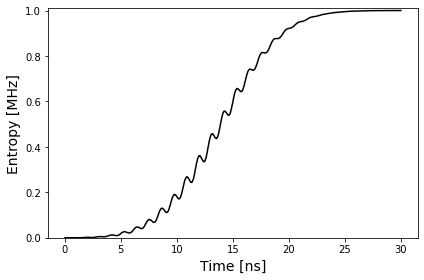

In [2]:
time, entropy = np.load('/home/user/Schreibtisch/results/4-level qubit/2 LOs/1 transmon/iCNOT/entanglement_after.npy', allow_pickle=True)

fig, ax = plt.subplots(1,1)
ax.plot(time * 1e9, entropy[:-1], color='black')

ax.set_xlabel("Time [ns]", fontsize=14)
ax.set_ylabel("Entropy [MHz]", fontsize=14)
ax.set_ylim(0, 1.01)

plt.tight_layout()
plt.savefig('/home/user/rz90p_q2_signal.pdf', bbox_inches="tight", dpi=100)
plt.show()

### Plots the fidelity of a gate after optimisation depending on the number of frequencies in the signal

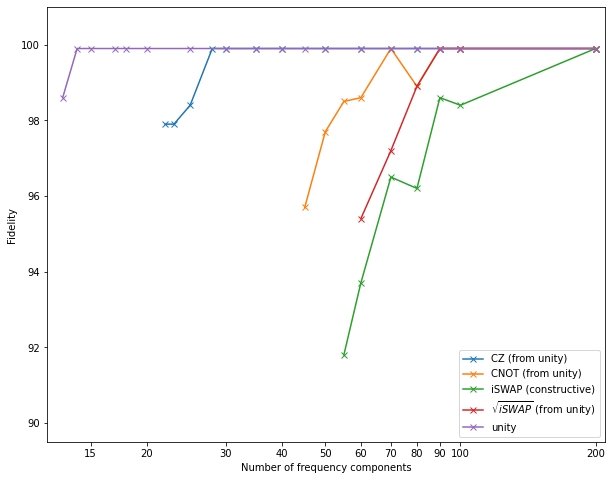

In [3]:
# Data for two transmons with 5 levels each, dressed. The data comes from the ODS table file.
gates = np.array(["CZ", "CZ (from unity)", "CNOT", "CNOT (constructive)", "CNOT (from unity)", "iCNOT", "iSWAP", "iSWAP (constructive)", "$\\sqrt{iSWAP}$ (constructive)", "$\\sqrt{iSWAP}$ (from unity)", "unity"])
selectedGates = [1, 4, 7, 9, 10]
frequencies = np.array([200, 100, 90, 80, 70, 60, 55, 50, 45, 40, 35, 30, 28, 26, 25, 24, 23, 22, 21, 20, 20/15, 18, 17, 15, 14, 13, 12, 11, 10])
data = np.array([
    [95, 90.8, 98.8, 98.7, 97.6, 97.1, None, 95.6, 96, 94, 97.5, 95, None, None, 94.5, None, None, None, None, 95, None,
     None, None, 96.5, 96.4, 92.5, 95.0, 95.4],
    [99.9, 99.9, 99.9, 99.9, 99.9, 99.9, None, 99.9, None, 99.9, 99.9, 99.9, 99.9, None, 98.4, None, 97.9, 97.9, None,
     None, None, None, None, None, None, None, None, None],
    [98.1, 99, 98.8, 98.6, 98.5, 97.8, None, 97.7, None, 97.4, 97.4, 96.9, None, None, 92.5, 90.6, 92.2, 90.9, 89.4,
     None, None, None, None, None, None, None, None, None],
    [99.9, 99.9, 99.9, 99.9, 99.9, 99.9, None, 96.1, 96.3, 97.1, 92.7, 91.1, 92.1, 82.3, None, None, None, None, None,
     None, None, None, None, None, None, None, None, None],
    [99.9, 99.9, 99.9, 98.9, 99.9, 98.6, 98.5, 97.7, 95.7, None, None, None, None, None, None, None, None, None, None,
     None, None, None, None, None, None, None, None, None],
    [99.9, 99.9, 99.9, 98.8, 97.5, 89.9, None, None, None, None, None, None, None, None, None, None, None, None, None,
     None, None, None, None, None, None, None, None, None],
    [99.9, 95.4, 95.7, 94.3, 94.7, 92.0, None, 83.4, None, None, None, None, None, None, None, None, None, None, None,
     None, None, None, None, None, None, None, None, None],
    [99.9, 98.4, 98.6, 96.2, 96.5, 93.7, 91.8, 85.5, None, None, None, None, None, None, None, None, None, None, None,
     None, None, None, None, None, None, None, None, None],
    [99.9, 98.8, 98.6, 98.7, 98.1, 94.6, None, 94.6, 94.4, 94.7, 92.3, 90.6, 90.0, 84.1, None, None, None, None, None,
     None, None, None, None, None, None, None, None, None],
    [99.9, 99.9, 99.9, 98.9, 97.2, 95.4, None, None, None, None, None, None, None, None, None, None, None, None, None,
     None, None, None, None, None, None, None, None, None],
    [99.9, 99.9, 99.9, 99.9, 99.9, 99.9, None, 99.9, 99.9, 99.9, 99.9, 99.9, None, None, 99.9, None, None, None, None,
     99.9, None, 99.9, 99.9, 99.9, 99.9, 98.6, None, None],
    [95, 90.8, 98.8, 98.7, 97.6, 97.1, None, 95.6, 96, 94, 97.5, 95, None, None, 94.5, None, None, None, None, 95, None,
     None, None, 96.5, 96.4, 92.5, 95.0, 95.4],
    [99.9, 99.9, 99.9, 99.9, 99.9, 99.9, None, 99.9, None, 99.9, 99.9, 99.9, 99.9, None, 98.4, None, 97.9, 97.9, None,
     None, None, None, None, None, None, None, None, None],
    [98.1, 99, 98.8, 98.6, 98.5, 97.8, None, 97.7, None, 97.4, 97.4, 96.9, None, None, 92.5, 90.6, 92.2, 90.9, 89.4,
     None, None, None, None, None, None, None, None, None],
    [99.9, 99.9, 99.9, 99.9, 99.9, 99.9, None, 96.1, 96.3, 97.1, 92.7, 91.1, 92.1, 82.3, None, None, None, None, None,
     None, None, None, None, None, None, None, None, None],
    [99.9, 99.9, 99.9, 98.9, 99.9, 98.6, 98.5, 97.7, 95.7, None, None, None, None, None, None, None, None, None, None,
     None, None, None, None, None, None, None, None, None],
    [99.9, 99.9, 99.9, 98.8, 97.5, 89.9, None, None, None, None, None, None, None, None, None, None, None, None, None,
     None, None, None, None, None, None, None, None, None],
    [99.9, 95.4, 95.7, 94.3, 94.7, 92.0, None, 83.4, None, None, None, None, None, None, None, None, None, None, None,
     None, None, None, None, None, None, None, None, None],
    [99.9, 98.4, 98.6, 96.2, 96.5, 93.7, 91.8, 85.5, None, None, None, None, None, None, None, None, None, None, None,
     None, None, None, None, None, None, None, None, None],
    [99.9, 98.8, 98.6, 98.7, 98.1, 94.6, None, 94.6, 94.4, 94.7, 92.3, 90.6, 90.0, 84.1, None, None, None, None, None,
     None, None, None, None, None, None, None, None, None],
    [99.9, 99.9, 99.9, 98.9, 97.2, 95.4, None, None, None, None, None, None, None, None, None, None, None, None, None,
     None, None, None, None, None, None, None, None, None],
    [99.9, 99.9, 99.9, 99.9, 99.9, 99.9, None, 99.9, 99.9, 99.9, 99.9, 99.9, None, None, 99.9, None, None, None, None,
     99.9, None, 99.9, 99.9, 99.9, 99.9, 98.6, None, None],
    [95, 90.8, 98.8, 98.7, 97.6, 97.1, None, 95.6, 96, 94, 97.5, 95, None, None, 94.5, None, None, None, None, 95, None,
     None, None, 96.5, 96.4, 92.5, 95.0, 95.4, ],
    [99.9, 99.9, 99.9, 99.9, 99.9, 99.9, None, 99.9, None, 99.9, 99.9, 99.9, 99.9, None, 98.4, None, 97.9, 97.9, None,
     None, None, None, None, None, None, None, None, None],
    [98.1, 99, 98.8, 98.6, 98.5, 97.8, None, 97.7, None, 97.4, 97.4, 96.9, None, None, 92.5, 90.6, 92.2, 90.9, 89.4,
     None, None, None, None, None, None, None, None, None],
    [99.9, 99.9, 99.9, 99.9, 99.9, 99.9, None, 96.1, 96.3, 97.1, 92.7, 91.1, 92.1, 82.3, None, None, None, None, None,
     None, None, None, None, None, None, None, None, None],
    [99.9, 99.9, 99.9, 98.9, 99.9, 98.6, 98.5, 97.7, 95.7, None, None, None, None, None, None, None, None, None, None,
     None, None, None, None, None, None, None, None, None],
    [99.9, 99.9, 99.9, 98.8, 97.5, 89.9, None, None, None, None, None, None, None, None, None, None, None, None, None,
     None, None, None, None, None, None, None, None, None]
])

# Create the plot
fig = plt.figure(figsize=(10,8))
for i in selectedGates:
    d, f = data[i], frequencies
    indices = np.where(d != None)[0]
    d, f = d[indices], f[indices]
    indices = np.where(d >= 90.0)[0]
    d, f = d[indices], f[indices]
    plt.plot(f, d, 'x-', label=gates[i])
plt.legend(loc='lower right')

plt.xlabel('Number of frequency components')
plt.xscale('log')
plt.xticks([10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200])
plt.xlim(12, 210)
plt.ylabel('Fidelity')
plt.ylim(89.5, 101)

fig.gca().get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
plt.show()

### Creates a spectrogram of a signal's frequency spectrum

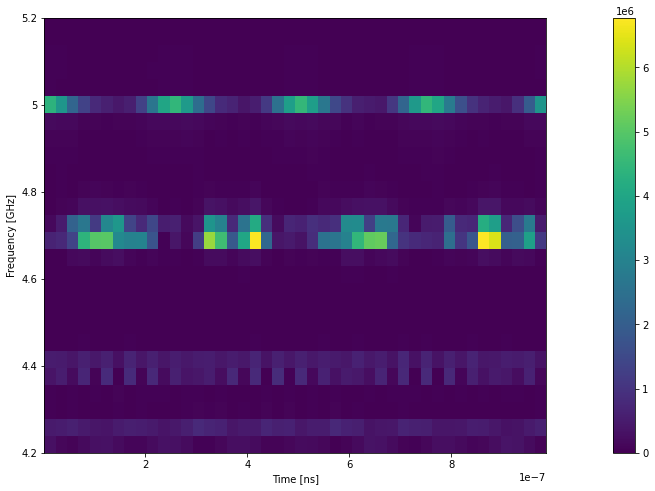

In [5]:
# Load the signal and calculate the spectrogram
time, signal = np.load('/home/user/Schreibtisch/results/4-level qubit/Fourier basis 5 levels, 1000ns/13-0 freqs/unity/signal_t1_after.npy')
f, t, Sxx = scps.spectrogram(signal, fs=20e9, nperseg=512)

# Create the plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
plt.pcolormesh(t, f, Sxx, shading='nearest', cmap=cm.get_cmap("viridis"))
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda y, pos: '{0:g}'.format(y * 1e-9)))
ax.set_ylim(4.2e9, 5.2e9)
plt.ylabel('Frequency [GHz]')
plt.xlabel('Time [ns]')

# Add a colour bar
norm = colors.Normalize(vmin=np.min(Sxx), vmax=np.max(Sxx))
cbar = fig.colorbar(
    cm.ScalarMappable(norm=norm, cmap=cm.get_cmap("viridis")),
    ax=ax,
    shrink=1,
    pad=0.1,
    #ticks=[-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi],
)
plt.show()